<a href="" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def funct(x):
  return x*x*np.sin(x)+np.log(2*x)

size = 150
low=0
high=12
error=25

XX_train = np.random.uniform(low=low, high=high, size=size)
XX_test = np.random.uniform(low=low, high=high, size=size)
yy_train = funct(XX_train) + np.random.normal(0., error, size)
yy_test = funct(XX_test) + np.random.normal(0., error, size)

print(XX_train.shape, yy_train.shape)

(150,) (150,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

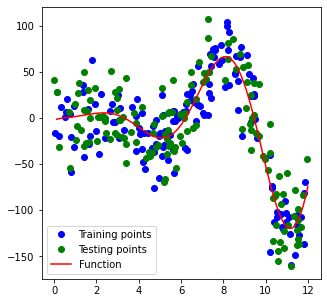

In [ ]:
fig = plt.figure(figsize=(5,5))

plt.plot(XX_train,yy_train, 'o', color='blue', label='Training points')
plt.plot(XX_test,yy_test, 'o', color='green', label='Testing points')

points = np.linspace(low, high,num=100)
plt.plot(points, funct(points),  color='red', label='Function')
plt.legend()


plt.show

In [ ]:
mean = XX_train.mean(axis=0)
XX_train_n = XX_train-mean
std = XX_train_n.std(axis=0)
XX_train_n /= std

# to samo dla X_test
XX_test_n = XX_test - mean
XX_test_n /= std

# A teraz to samo dla yy_train i yy_test
mean1 = yy_train.mean(axis=0)
yy_train_n = yy_train-mean1
std1 = yy_train_n.std(axis=0)
yy_train_n /= std1
# to samo dla y_test
yy_test_n = yy_test - mean1
yy_test_n /= std1

In [ ]:
from keras import models
from keras import layers

model0 = Sequential()
#.......
model0.add(layers.Dense(1024, activation='relu', input_shape=(1,)))
model0.add(Dropout(0.2))
model0.add(layers.Dense(1024, activation='relu'))
model0.add(Dropout(0.2))
model0.add(layers.Dense(1, activation='linear'))

model0.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mse'])

model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              2048      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 1,052,673
Trainable params: 1,052,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model0.fit(XX_train_n,yy_train_n, epochs=200, batch_size=512, validation_data=(XX_test_n, yy_test_n))

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 1.0049 - mse: 1.0049 - val_loss: 0.7633 - val_mse: 0.7633
Epoch 2/200
1/1 [==============================] - 0s 73ms/step - loss: 0.8876 - mse: 0.8876 - val_loss: 0.6839 - val_mse: 0.6839
Epoch 3/200
1/1 [==============================] - 0s 76ms/step - loss: 0.8575 - mse: 0.8575 - val_loss: 0.6877 - val_mse: 0.6877
Epoch 4/200
1/1 [==============================] - 0s 68ms/step - loss: 0.8535 - mse: 0.8535 - val_loss: 0.6938 - val_mse: 0.6938
Epoch 5/200
1/1 [==============================] - 0s 74ms/step - loss: 0.8421 - mse: 0.8421 - val_loss: 0.6865 - val_mse: 0.6865
Epoch 6/200
1/1 [==============================] - 0s 72ms/step - loss: 0.8125 - mse: 0.8125 - val_loss: 0.6798 - val_mse: 0.6798
Epoch 7/200
1/1 [==============================] - 0s 84ms/step - loss: 0.7875 - mse: 0.7875 - val_loss: 0.6788 - val_mse: 0.6788
Epoch 8/200
1/1 [==============================] - 0s 74ms/step - loss: 0.7770 - mse: 0.7770

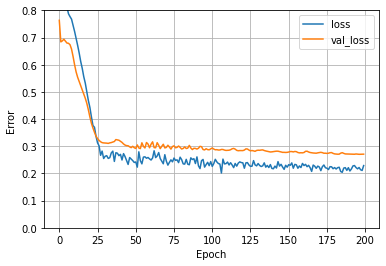

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.8])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
results = model0.evaluate(XX_test_n, yy_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model0.evaluate(XX_train_n, yy_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

5/5 [==============================] - 0s 4ms/step - loss: 0.2709 - mse: 0.2709
loss test data:  0.27092862129211426
mse test data:  0.27092862129211426
5/5 [==============================] - 0s 4ms/step - loss: 0.2049 - mse: 0.2049
loss train data:  0.20490866899490356
mse train data:  0.20490866899490356


<function matplotlib.pyplot.show>

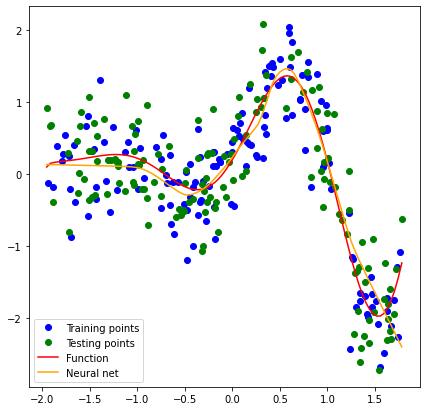

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n,yy_train_n, 'o', color='blue', label='Training points')
plt.plot(XX_test_n,yy_test_n, 'o', color='green', label='Testing points')

points = np.linspace(min(XX_test_n), max(XX_test_n),num=100)
plt.plot(points, (funct(points*std+mean)-mean1)/std1,  color='red', label='Function')

plt.plot(points, model0.predict(points),  color='orange', label='Neural net')


plt.legend()


plt.show

In [ ]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
mean = XX_train.mean(axis=0)
XX_train_n = XX_train-mean
std = XX_train_n.std(axis=0)
XX_train_n /= std

# to samo dla X_test
XX_test_n = XX_test - mean
XX_test_n /= std

# A teraz to samo dla yy_train i yy_test
mean1 = yy_train.mean(axis=0)
yy_train_n = yy_train-mean1
std1 = yy_train_n.std(axis=0)
yy_train_n /= std1
# to samo dla y_test
yy_test_n = yy_test - mean1
yy_test_n /= std1

In [ ]:
from keras import models
from keras import layers

model0 = Sequential()
#.......
model0.add(layers.Dense(1024, activation='relu', input_shape=(1,)))
model0.add(Dropout(0.2))
model0.add(layers.Dense(1024, activation='relu'))
model0.add(Dropout(0.2))
model0.add(layers.Dense(1, activation='linear'))

model0.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mse'])

In [ ]:
history = model0.fit(XX_train_n,yy_train_n, epochs=200, batch_size=512, validation_data=(XX_test_n, yy_test_n))

Epoch 1/200
1/1 [==============================] - 1s 706ms/step - loss: 0.9787 - mse: 0.9787 - val_loss: 0.7477 - val_mse: 0.7477
Epoch 2/200
1/1 [==============================] - 0s 89ms/step - loss: 0.8767 - mse: 0.8767 - val_loss: 0.6878 - val_mse: 0.6878
Epoch 3/200
1/1 [==============================] - 0s 77ms/step - loss: 0.8466 - mse: 0.8466 - val_loss: 0.7040 - val_mse: 0.7040
Epoch 4/200
1/1 [==============================] - 0s 75ms/step - loss: 0.8508 - mse: 0.8508 - val_loss: 0.6784 - val_mse: 0.6784
Epoch 5/200
1/1 [==============================] - 0s 75ms/step - loss: 0.8179 - mse: 0.8179 - val_loss: 0.6597 - val_mse: 0.6597
Epoch 6/200
1/1 [==============================] - 0s 81ms/step - loss: 0.7959 - mse: 0.7959 - val_loss: 0.6649 - val_mse: 0.6649
Epoch 7/200
1/1 [==============================] - 0s 75ms/step - loss: 0.7903 - mse: 0.7903 - val_loss: 0.6741 - val_mse: 0.6741
Epoch 8/200
1/1 [==============================] - 0s 75ms/step - loss: 0.7771 - mse: 0.7

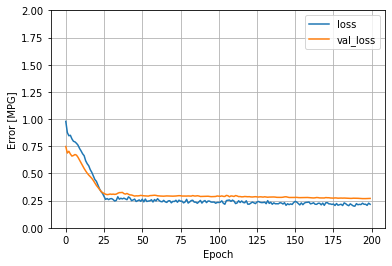

In [ ]:
 def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
results = model0.evaluate(XX_test_n, yy_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model0.evaluate(XX_train_n, yy_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

5/5 [==============================] - 0s 4ms/step - loss: 0.2702 - mse: 0.2702
loss test data:  0.2701917886734009
mse test data:  0.2701917886734009
5/5 [==============================] - 0s 4ms/step - loss: 0.2027 - mse: 0.2027
loss train data:  0.2026800513267517
mse train data:  0.2026800513267517
